# Import necessary libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Load data And Explore Data


In [2]:
df = pd.read_csv("marketing_campaign_dataset.csv")
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


### Initial Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [4]:
df.isnull().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

In [5]:
df.describe()

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


In [6]:
df.dtypes

Campaign_ID           int64
Company              object
Campaign_Type        object
Target_Audience      object
Duration             object
Channel_Used         object
Conversion_Rate     float64
Acquisition_Cost     object
ROI                 float64
Location             object
Language             object
Clicks                int64
Impressions           int64
Engagement_Score      int64
Customer_Segment     object
Date                 object
dtype: object

In [7]:
df.shape

(200000, 16)

In [8]:
print("\nUnique values (categorical):")
print(df.select_dtypes(include='object').nunique())



Unique values (categorical):
Company                 5
Campaign_Type           5
Target_Audience         5
Duration                4
Channel_Used            6
Acquisition_Cost    15001
Location                5
Language                5
Customer_Segment        5
Date                  365
dtype: int64


### Clean Columns

In [9]:
# Clean and convert Acquisition_Cost to float
df["Acquisition_Cost"] = (
    df["Acquisition_Cost"]
    .astype(str)                          # make sure all entries are strings
    .str.replace(r"[^\d.]", "", regex=True)  # remove everything except digits and decimal
    .astype(float)                        # convert to float
)


### Outlier Detection

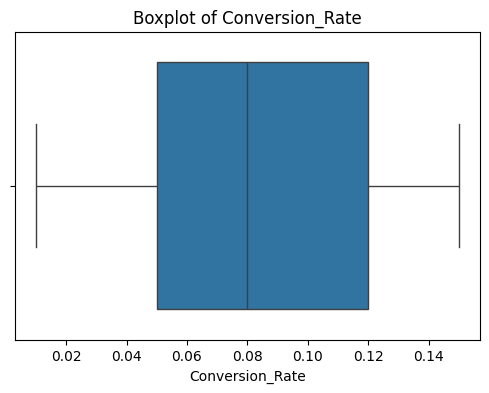

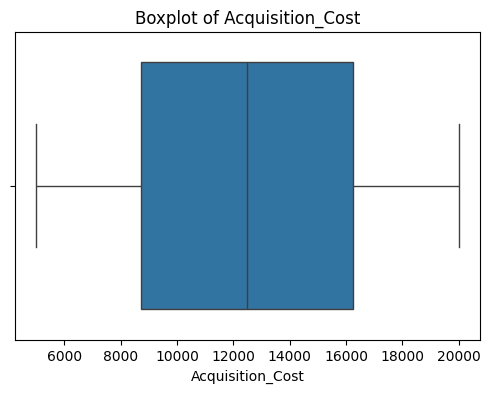

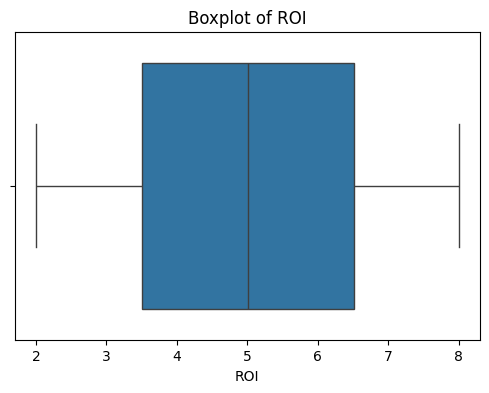

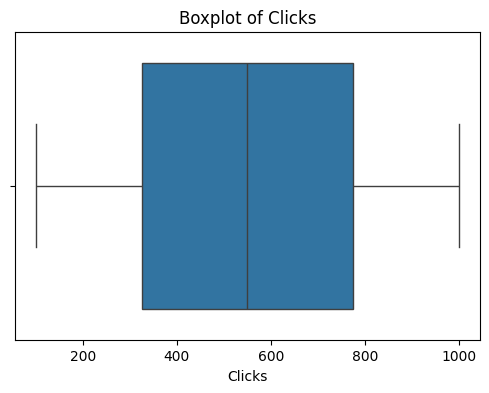

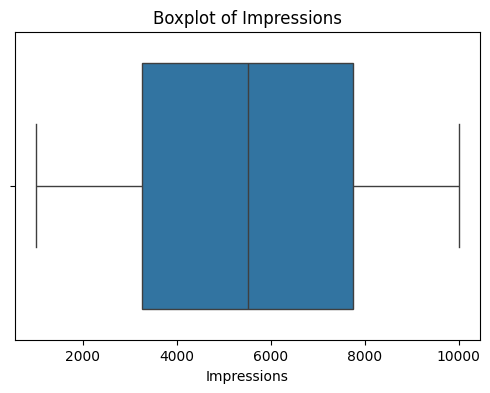

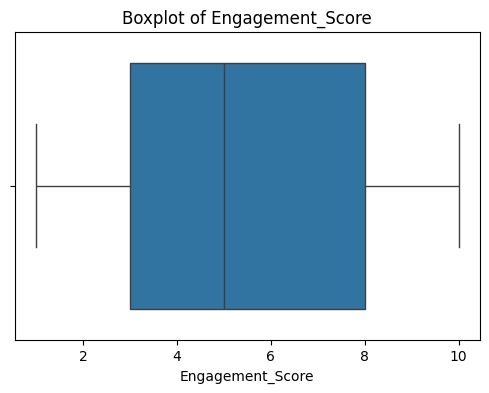

Outliers in Acquisition_Cost:
Empty DataFrame
Columns: [Campaign_ID, Acquisition_Cost]
Index: []


In [37]:
numeric_cols = ["Conversion_Rate", "Acquisition_Cost", "ROI", "Clicks", "Impressions", "Engagement_Score"]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# IQR method example for Acquisition_Cost
Q1 = df["Acquisition_Cost"].quantile(0.25)
Q3 = df["Acquisition_Cost"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["Acquisition_Cost"] < (Q1 - 1.5 * IQR)) | (df["Acquisition_Cost"] > (Q3 + 1.5 * IQR))]
print("Outliers in Acquisition_Cost:")
print(outliers[["Campaign_ID", "Acquisition_Cost"]])


###  Encode Categorical Variables

In [38]:
# Select only relevant categorical columns for encoding
categorical_cols = ["Channel_Used", "Location", "Company"]  # adjust if your dataset has these

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Keep Date as datetime, not one-hot
df_encoded["Date"] = pd.to_datetime(df["Date"])

# Check shape after encoding
print("Shape after encoding:", df_encoded.shape)
print("Columns after encoding:", df_encoded.columns[:20])  # show first 20


Shape after encoding: (200000, 26)
Columns after encoding: Index(['Campaign_ID', 'Campaign_Type', 'Target_Audience', 'Duration',
       'Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Language', 'Clicks',
       'Impressions', 'Engagement_Score', 'Customer_Segment', 'Date',
       'Channel_Used_Facebook', 'Channel_Used_Google Ads',
       'Channel_Used_Instagram', 'Channel_Used_Website',
       'Channel_Used_YouTube', 'Location_Houston', 'Location_Los Angeles'],
      dtype='object')


In [20]:
# Convert Date column to datetime
df_encoded["Date"] = pd.to_datetime(df_encoded["Date"])

# Feature Engineering
df_encoded["CTR"] = np.where(df_encoded["Impressions"] > 0,
                             df_encoded["Clicks"] / df_encoded["Impressions"],
                             0)

df_encoded["CPA"] = np.where(df_encoded["Conversion_Rate"] > 0,
                             df_encoded["Acquisition_Cost"] / df_encoded["Conversion_Rate"],
                             0)

# Extract features from Date
df_encoded["Day"] = df_encoded["Date"].dt.day
df_encoded["Month"] = df_encoded["Date"].dt.month
df_encoded["Weekday"] = df_encoded["Date"].dt.day_name()


In [21]:
# 1. Click-Through Rate (CTR)
df_encoded["CTR"] = np.where(
    df_encoded["Impressions"] > 0,
    df_encoded["Clicks"] / df_encoded["Impressions"],
    0
)

# 2. Cost per Acquisition (CPA)
df_encoded["CPA"] = np.where(
    df_encoded["Conversion_Rate"] > 0,
    df_encoded["Acquisition_Cost"] / df_encoded["Conversion_Rate"],
    0
)

# 3. Extract features from Date
df_encoded["Date"] = pd.to_datetime(df_encoded["Date"])
df_encoded["Day"] = df_encoded["Date"].dt.day
df_encoded["Month"] = df_encoded["Date"].dt.month
df_encoded["Weekday"] = df_encoded["Date"].dt.day_name()

# Optional: Convert Weekday to categorical dummies
df_encoded = pd.get_dummies(df_encoded, columns=["Weekday"], drop_first=True)

# 4. (Optional) Campaign Duration if you have Start_Date and End_Date
if "Start_Date" in df_encoded.columns and "End_Date" in df_encoded.columns:
    df_encoded["Start_Date"] = pd.to_datetime(df_encoded["Start_Date"])
    df_encoded["End_Date"] = pd.to_datetime(df_encoded["End_Date"])
    df_encoded["Campaign_Duration"] = (df_encoded["End_Date"] - df_encoded["Start_Date"]).dt.days

# Check the updated dataset
print("Shape after feature engineering:", df_encoded.shape)
df_encoded.head()


Shape after feature engineering: (200000, 36)


,Campaign_ID,Campaign_Type,Target_Audience,Duration,Conversion_Rate,Acquisition_Cost,ROI,Language,Clicks,Impressions,...,CTR,CPA,Day,Month,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,1,Email,Men 18-24,30 days,0.04,16174.0,6.29,Spanish,506,1922,...,0.263267,404350.000000,1,1,False,False,False,False,False,False
1,2,Email,Women 35-44,60 days,0.12,11566.0,5.61,German,116,7523,...,0.015419,96383.333333,2,1,False,True,False,False,False,False
2,3,Influencer,Men 25-34,30 days,0.07,10200.0,7.18,French,584,7698,...,0.075864,145714.285714,3,1,False,False,True,False,False,False
3,4,Display,All Ages,60 days,0.11,12724.0,5.55,Mandarin,217,1820,...,0.119231,115672.727273,4,1,True,False,False,False,False,False
4,5,Email,Men 25-34,15 days,0.05,16452.0,6.50,Mandarin,379,4201,...,0.090217,329040.000000,5,1,False,False,False,False,True,False


## Scaling / Normalization

In [24]:
# Select numeric columns for scaling
numeric_cols = ["Conversion_Rate", "Acquisition_Cost", "ROI", "Clicks", "Impressions", 
                "Engagement_Score", "CTR", "CPA"]

# Initialize scaler
scaler = MinMaxScaler()

# Apply scaling
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Check the scaled data
df_encoded.head()

,Campaign_ID,Campaign_Type,Target_Audience,Duration,Conversion_Rate,Acquisition_Cost,ROI,Language,Clicks,Impressions,...,CTR,CPA,Day,Month,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,1,Email,Men 18-24,30 days,0.214286,0.744933,0.715000,Spanish,0.451111,0.102444,...,0.257862,0.188647,1,1,False,False,False,False,False,False
1,2,Email,Women 35-44,60 days,0.785714,0.437733,0.601667,German,0.017778,0.724778,...,0.005464,0.032053,2,1,False,True,False,False,False,False
2,3,Influencer,Men 25-34,30 days,0.428571,0.346667,0.863333,French,0.537778,0.744222,...,0.067018,0.057136,3,1,False,False,True,False,False,False
3,4,Display,All Ages,60 days,0.714286,0.514933,0.591667,Mandarin,0.130000,0.091111,...,0.111181,0.041861,4,1,True,False,False,False,False,False
4,5,Email,Men 25-34,15 days,0.285714,0.763467,0.750000,Mandarin,0.310000,0.355667,...,0.081634,0.150354,5,1,False,False,False,False,True,False


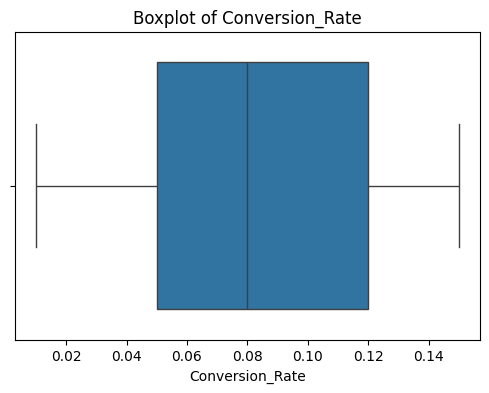

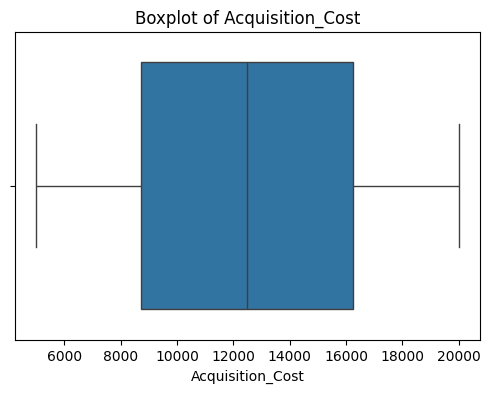

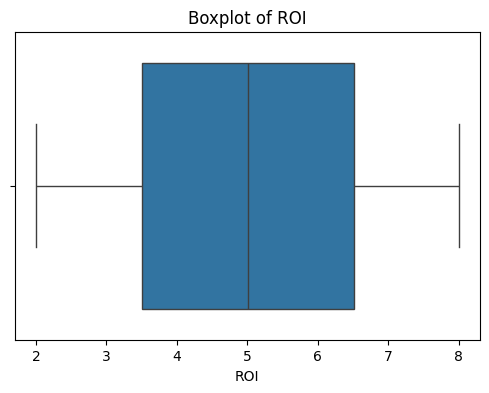

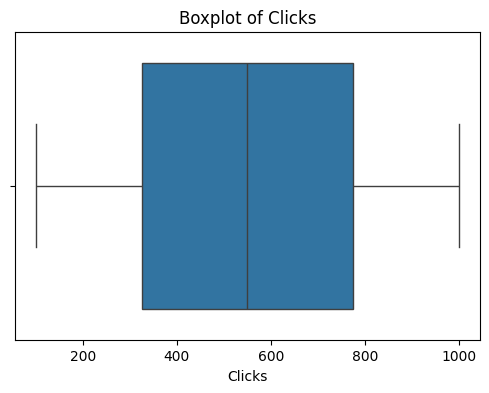

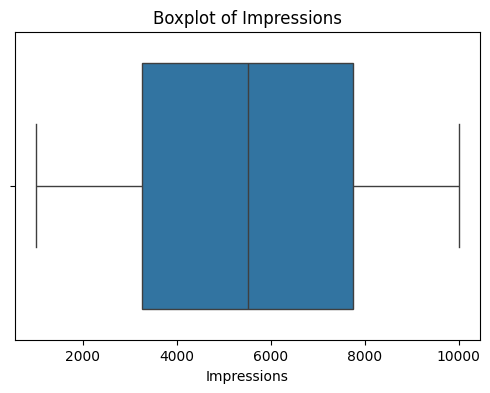

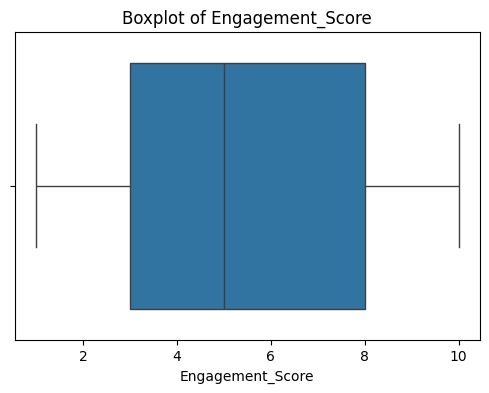

Outliers in Acquisition_Cost:
Empty DataFrame
Columns: [Campaign_ID, Acquisition_Cost]
Index: []


In [10]:
numeric_cols = ["Conversion_Rate", "Acquisition_Cost", "ROI", "Clicks", "Impressions", "Engagement_Score"]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Calculate IQR for Acquisition_Cost
Q1 = df["Acquisition_Cost"].quantile(0.25)
Q3 = df["Acquisition_Cost"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["Acquisition_Cost"] < (Q1 - 1.5 * IQR)) | (df["Acquisition_Cost"] > (Q3 + 1.5 * IQR))]
print("Outliers in Acquisition_Cost:")
print(outliers[["Campaign_ID", "Acquisition_Cost"]])


## Plot Campaign Performance Over Time

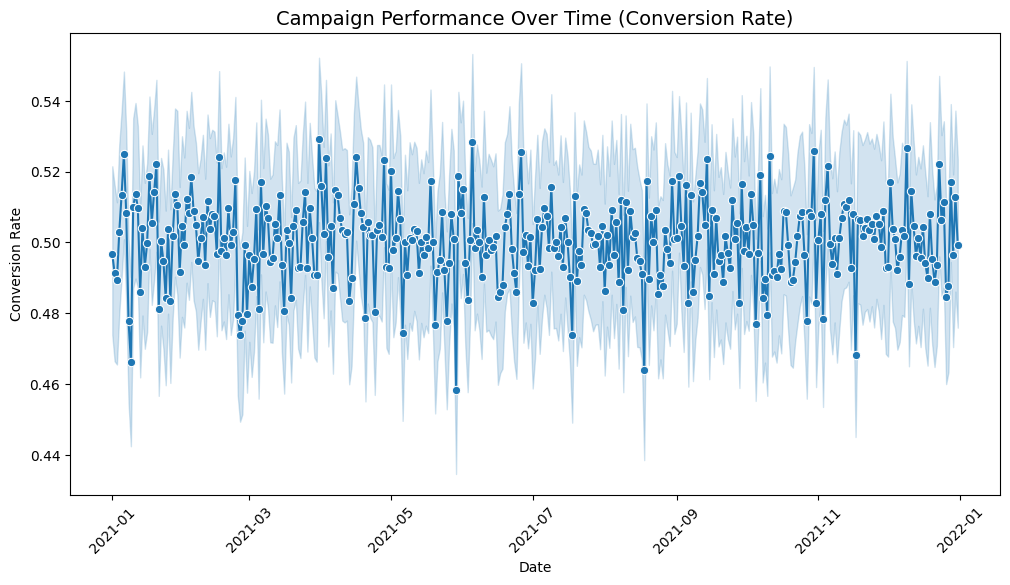

In [26]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Conversion_Rate", data=df_encoded, marker="o")
plt.title("Campaign Performance Over Time (Conversion Rate)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

## Compare Conversion Rates Across Channels


C:\Users\Dell\AppData\Local\Temp\ipykernel_12688\787356987.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Channel", y="Conversion_Rate", data=df_channels_active, palette="Set2")


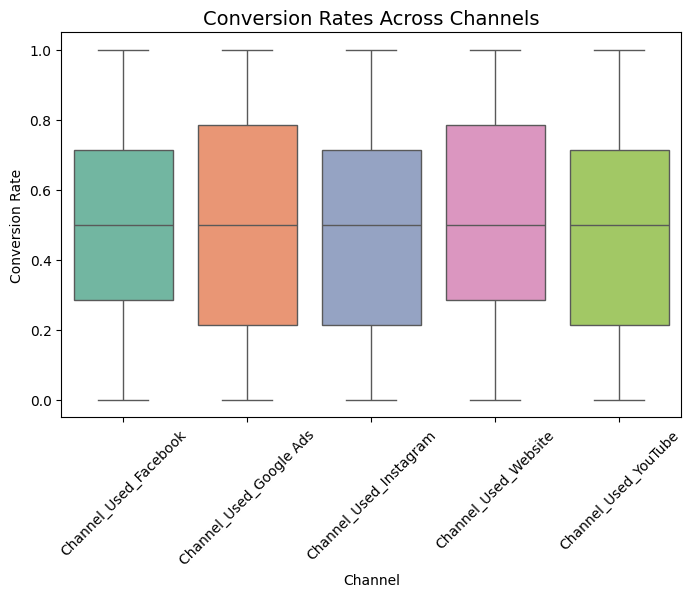

In [27]:
channel_cols = [col for col in df_encoded.columns if "Channel_Used_" in col]
df_channels = df_encoded.melt(id_vars=["Conversion_Rate"], value_vars=channel_cols, 
                              var_name="Channel", value_name="Active")
df_channels_active = df_channels[df_channels["Active"]==1]

plt.figure(figsize=(8,5))
sns.boxplot(x="Channel", y="Conversion_Rate", data=df_channels_active, palette="Set2")
plt.title("Conversion Rates Across Channels", fontsize=14)
plt.xlabel("Channel")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

## Average Conversion Rate by Location

C:\Users\Dell\AppData\Local\Temp\ipykernel_12688\4136550272.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Location", y="Conversion_Rate", data=df_locations_active, estimator="mean", ci=None, palette="muted")
C:\Users\Dell\AppData\Local\Temp\ipykernel_12688\4136550272.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Location", y="Conversion_Rate", data=df_locations_active, estimator="mean", ci=None, palette="muted")


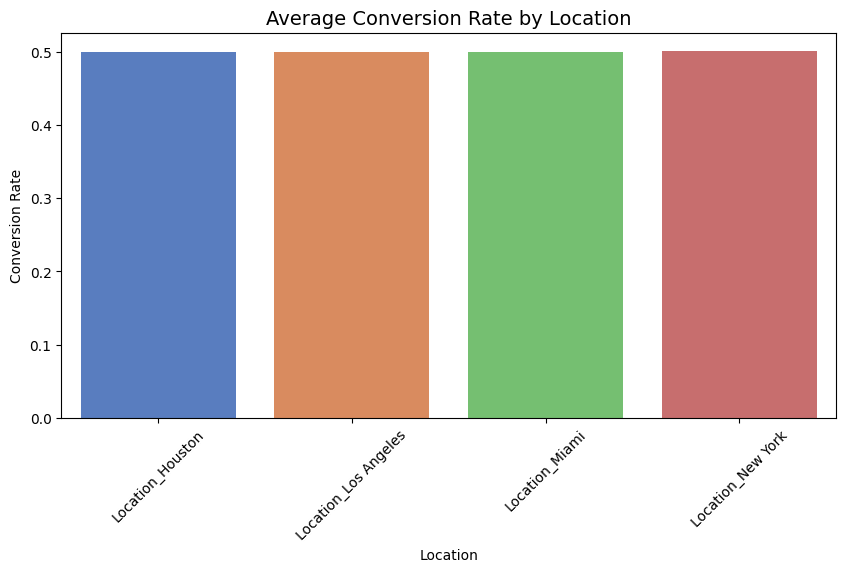

In [28]:
location_cols = [col for col in df_encoded.columns if "Location_" in col]
df_locations = df_encoded.melt(id_vars=["Conversion_Rate"], value_vars=location_cols, 
                               var_name="Location", value_name="Active")
df_locations_active = df_locations[df_locations["Active"]==1]

plt.figure(figsize=(10,5))
sns.barplot(x="Location", y="Conversion_Rate", data=df_locations_active, estimator="mean", ci=None, palette="muted")
plt.title("Average Conversion Rate by Location", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Conversion Rate")
plt.show()


## Heatmap & Correlation Plot

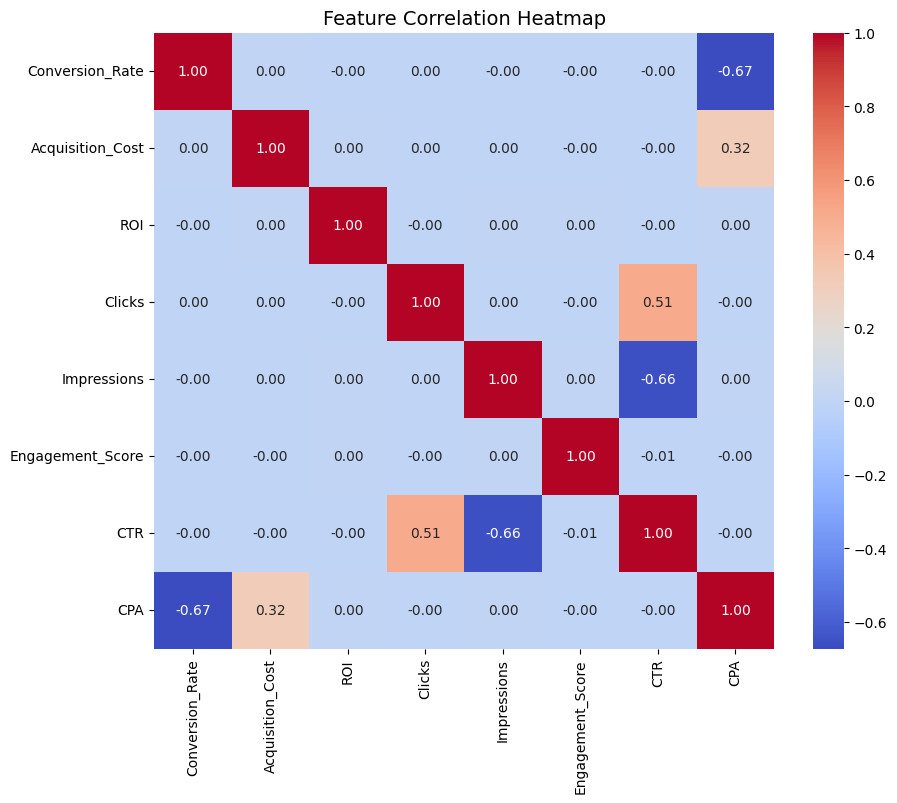

In [29]:
plt.figure(figsize=(10,8))
corr = df_encoded[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

## Top 10 Campaigns by ROI

C:\Users\Dell\AppData\Local\Temp\ipykernel_12688\2852673040.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Campaign_ID", y="ROI", data=top_campaigns, palette="Greens")


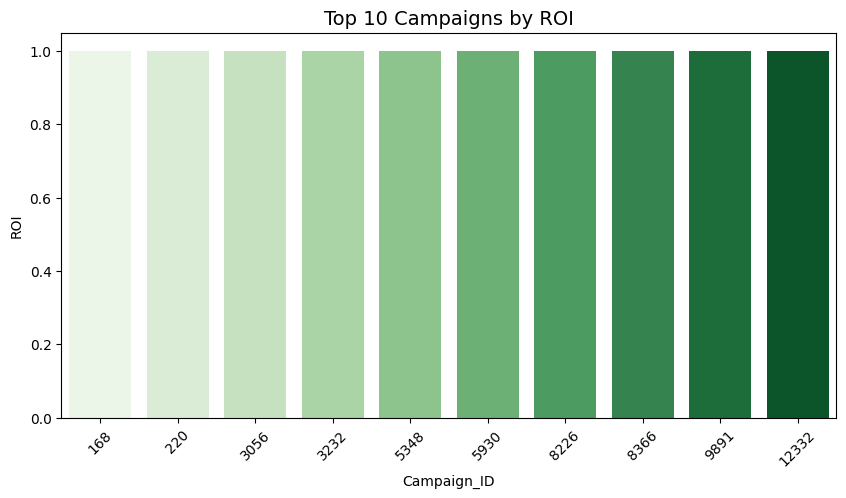

In [30]:
top_campaigns = df_encoded.nlargest(10, "ROI")
plt.figure(figsize=(10,5))
sns.barplot(x="Campaign_ID", y="ROI", data=top_campaigns, palette="Greens")
plt.title("Top 10 Campaigns by ROI", fontsize=14)
plt.xticks(rotation=45)
plt.show()

## Bottom 10 Campaigns by ROI

C:\Users\Dell\AppData\Local\Temp\ipykernel_12688\1615655367.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Campaign_ID", y="ROI", data=bottom_campaigns, palette="Reds")


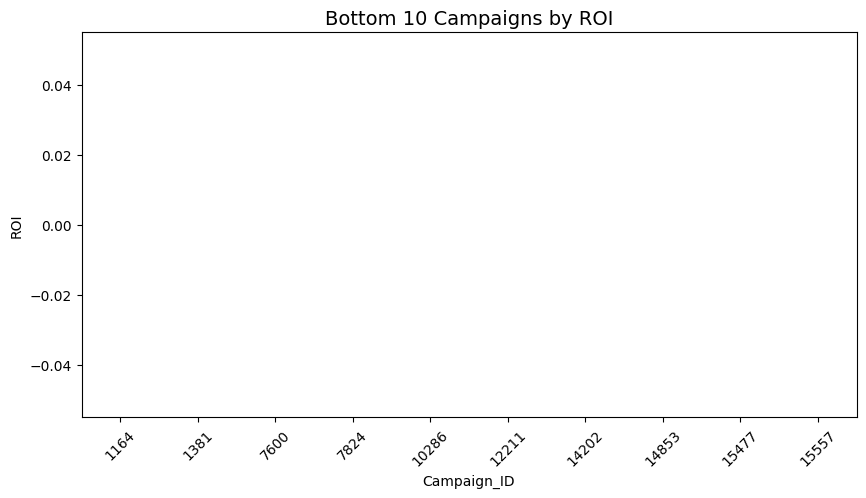

In [31]:
bottom_campaigns = df_encoded.nsmallest(10, "ROI")
plt.figure(figsize=(10,5))
sns.barplot(x="Campaign_ID", y="ROI", data=bottom_campaigns, palette="Reds")
plt.title("Bottom 10 Campaigns by ROI", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Insights Summary

### 1. Top 3 Channels by average Conversion Rate

In [32]:
channel_cols = [col for col in df_encoded.columns if "Channel_Used_" in col]
avg_channel_conversion = {col: df_encoded[df_encoded[col]==1]["Conversion_Rate"].mean() for col in channel_cols}
top_channels = sorted(avg_channel_conversion.items(), key=lambda x: x[1], reverse=True)[:3]
print("Top 3 Channels by Conversion Rate:", top_channels)

Top 3 Channels by Conversion Rate: [('Channel_Used_Google Ads', np.float64(0.5013094597250349)), ('Channel_Used_Website', np.float64(0.50130609797876)), ('Channel_Used_Facebook', np.float64(0.4999412361306387))]


### 2. Top 3 Locations by average Conversion Rate

In [33]:
location_cols = [col for col in df_encoded.columns if "Location_" in col]
avg_location_conversion = {col: df_encoded[df_encoded[col]==1]["Conversion_Rate"].mean() for col in location_cols}
top_locations = sorted(avg_location_conversion.items(), key=lambda x: x[1], reverse=True)[:3]
print("Top 3 Locations by Conversion Rate:", top_locations)

Top 3 Locations by Conversion Rate: [('Location_New York', np.float64(0.5014580537391851)), ('Location_Miami', np.float64(0.5003387930453417)), ('Location_Los Angeles', np.float64(0.5000929803418102))]


### 3. Campaigns with Highest ROI

In [34]:
top_roi_campaigns = df_encoded.nlargest(5, "ROI")[["Campaign_ID", "ROI"]]
print("\nTop 5 Campaigns by ROI:\n", top_roi_campaigns)


Top 5 Campaigns by ROI:
       Campaign_ID  ROI
167           168  1.0
219           220  1.0
3055         3056  1.0
3231         3232  1.0
5347         5348  1.0


### 4. Campaigns with Lowest ROI

In [35]:
bottom_roi_campaigns = df_encoded.nsmallest(5, "ROI")[["Campaign_ID", "ROI"]]
print("\nBottom 5 Campaigns by ROI:\n", bottom_roi_campaigns)


Bottom 5 Campaigns by ROI:
        Campaign_ID  ROI
1163          1164  0.0
1380          1381  0.0
7599          7600  0.0
7823          7824  0.0
10285        10286  0.0


###  5. Overall averages

In [36]:
overall_metrics = df_encoded[["Conversion_Rate", "CTR", "CPA", "ROI"]].mean()
print("\nOverall Average Metrics:\n", overall_metrics)


Overall Average Metrics:
 Conversion_Rate    0.500498
CTR                0.132745
CPA                0.109248
ROI                0.500406
dtype: float64
